In [ ]:
import pandas as pd

df = pd.read_csv('combined.csv')
df.head()

,author,created_utc,domain,title,selftext,subreddit,score,num_comments,ups,downs,permalink,is_self,url,subreddit_subscribers,upvote_ratio,is_original_content,media,selftext_html,author_flair_text,link_flair_text
0,FemShep_BestShep,2014-11-30 20:31:48,i.imgur.com,President Obama has achieved incredible progre...,NaN,democrats,199,58,199.0,0.0,/r/democrats/comments/2nvdsd/president_obama_h...,False,https://i.imgur.com/U01V6i7.png,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[deleted],2014-03-12 13:03:03,i.imgur.com,"As a self employed person, this is what ObamaC...",NaN,democrats,194,31,194.0,0.0,/r/democrats/comments/20854d/as_a_self_employe...,False,http://i.imgur.com/vCQdMUw.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Carmac,2014-11-10 15:16:55,lovebscott.com,Rolling Stone Names President Obama ‘One of th...,NaN,democrats,151,16,151.0,0.0,/r/democrats/comments/2lv4d6/rolling_stone_nam...,False,http://www.lovebscott.com/news/rolling-stone-n...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albert_Flasher,2014-12-25 12:21:44,i.imgur.com,Happy Holidays!,NaN,democrats,146,22,146.0,0.0,/r/democrats/comments/2qcyvu/happy_holidays/,False,http://i.imgur.com/y1lOJlS.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,papepipo,2014-05-21 17:49:30,ofa.barackobama.com,Obama identifies 150 members of congress who d...,NaN,democrats,142,6,142.0,0.0,/r/democrats/comments/264xpo/obama_identifies_...,False,http://ofa.barackobama.com/climate-deniers/#/,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df[df['url'] == 'https://i.redd.it/7ricepllzxk71.jpg'].index

Int64Index([7490], dtype='int64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7503 entries, 0 to 7502
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   author                 7503 non-null   object 
 1   created_utc            7503 non-null   object 
 2   domain                 7488 non-null   object 
 3   title                  7503 non-null   object 
 4   selftext               525 non-null    object 
 5   subreddit              7503 non-null   object 
 6   score                  7503 non-null   int64  
 7   num_comments           7503 non-null   int64  
 8   ups                    2339 non-null   float64
 9   downs                  2339 non-null   float64
 10  permalink              7503 non-null   object 
 11  is_self                7503 non-null   bool   
 12  url                    7488 non-null   object 
 13  subreddit_subscribers  4298 non-null   float64
 14  upvote_ratio           1853 non-null   float64
 15  is_o

In [ ]:
df.isnull().sum()

author                      0
created_utc                 0
domain                     15
title                       0
selftext                 6978
subreddit                   0
score                       0
num_comments                0
ups                      5164
downs                    5164
permalink                   0
is_self                     0
url                        15
subreddit_subscribers    3205
upvote_ratio             5650
is_original_content      3257
media                    7139
selftext_html            7497
author_flair_text        5188
link_flair_text          5168
dtype: int64

EAch post has an associated score, title, subreddit. Most have a url (image or article). There are many with missing upvote ratios and subscriber counts at the time of the post.

In [ ]:
df['subreddit'].value_counts()

democrats              900
socialism              900
politics               900
Conservative           900
Libertarian            900
SandersForPresident    700
LateStageCapitalism    700
The_Donald             600
JoeBiden               503
DemocraticSocialism    500
Name: subreddit, dtype: int64

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'created_utc' to datetime
# df['created_utc'] = pd.to_datetime(df['created_utc'], unit='s')

# Ensure numeric columns are in correct format, if not already
numeric_cols = ['score', 'num_comments', 'ups', 'downs', 'subreddit_subscribers', 'upvote_ratio']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')


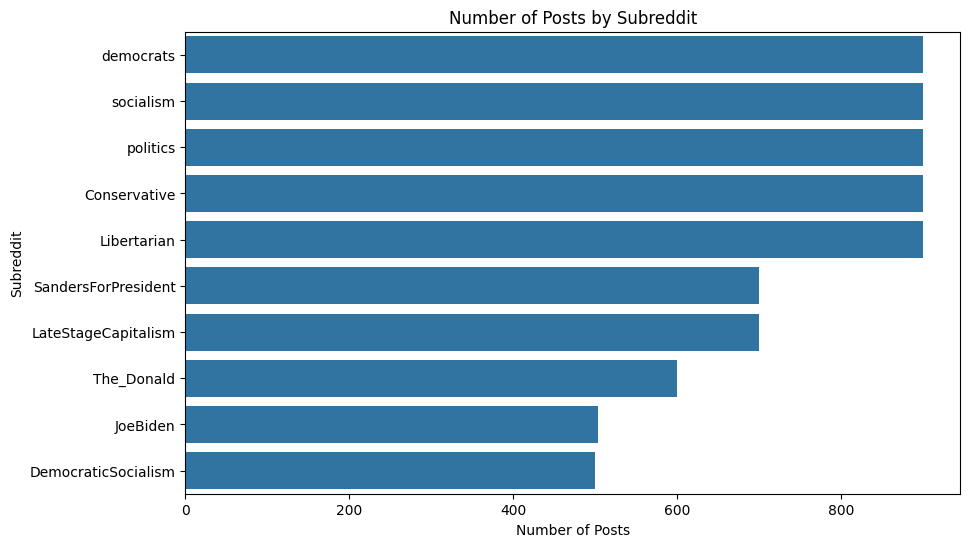

In [ ]:
# Post count by subreddit
plt.figure(figsize=(10, 6))
sns.countplot(y='subreddit', data=df, order = df['subreddit'].value_counts().index)
plt.title('Number of Posts by Subreddit')
plt.xlabel('Number of Posts')
plt.ylabel('Subreddit')
plt.show()


<ipython-input-12-19f14952f475>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='score', y='subreddit', data=df, estimator=sum, ci=None, order=df.groupby('subreddit')['score'].sum().sort_values(ascending=False).index)


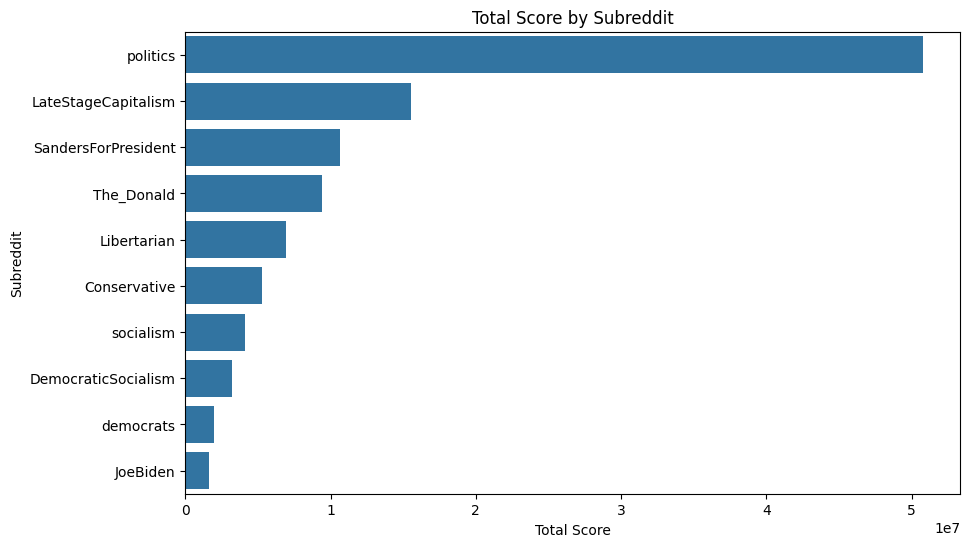

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='score', y='subreddit', data=df, estimator=sum, ci=None, order=df.groupby('subreddit')['score'].sum().sort_values(ascending=False).index)
plt.title('Total Score by Subreddit')
plt.xlabel('Total Score')
plt.ylabel('Subreddit')
plt.show()


<ipython-input-13-ccae8551bc53>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='num_comments', y='subreddit', data=df, estimator=sum, ci=None, order=df.groupby('subreddit')['num_comments'].sum().sort_values(ascending=False).index)


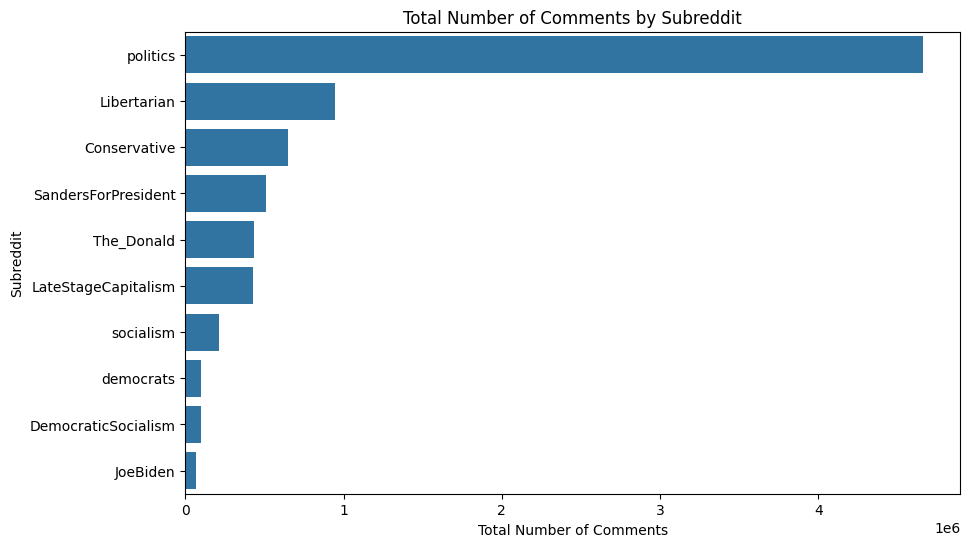

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='num_comments', y='subreddit', data=df, estimator=sum, ci=None, order=df.groupby('subreddit')['num_comments'].sum().sort_values(ascending=False).index)
plt.title('Total Number of Comments by Subreddit')
plt.xlabel('Total Number of Comments')
plt.ylabel('Subreddit')
plt.show()


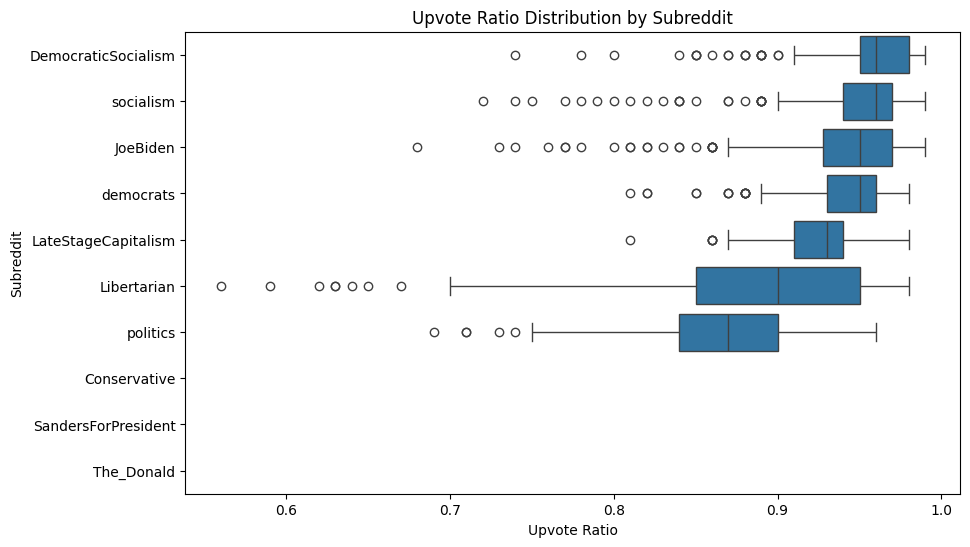

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='upvote_ratio', y='subreddit', data=df, order=df.groupby('subreddit')['upvote_ratio'].median().sort_values(ascending=False).index)
plt.title('Upvote Ratio Distribution by Subreddit')
plt.xlabel('Upvote Ratio')
plt.ylabel('Subreddit')
plt.show()


In [ ]:
df2 = df.copy()
df2['created_utc'] = pd.to_datetime(df2['created_utc'])

df2.set_index('created_utc', inplace=True)

In [ ]:
df['subreddit'].unique()

array(['democrats', 'JoeBiden', 'socialism', 'politics',
       'DemocraticSocialism', 'The_Donald', 'Conservative',
       'SandersForPresident', 'Libertarian', 'LateStageCapitalism'],
      dtype=object)

<ipython-input-34-fa5a871fc708>:24: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subreddit_df_resampled = subreddit_df.resample('W').mean()
<ipython-input-34-fa5a871fc708>:24: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subreddit_df_resampled = subreddit_df.resample('W').mean()
<ipython-input-34-fa5a871fc708>:24: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subreddit_df_resampled = subreddit_df.resample('W').mean(

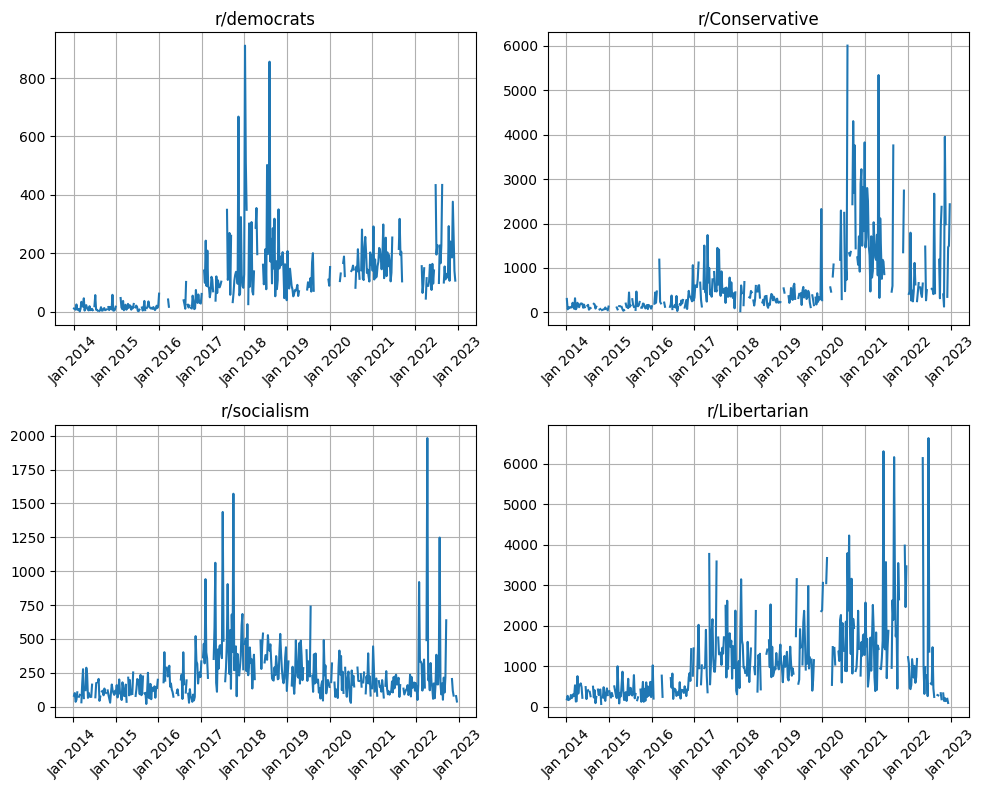

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Assuming 'df' is your DataFrame

# Let's create a figure and an array of subplots with 2 rows and 2 columns
fig, axs = plt.subplots(2, 2, figsize=(10, 8))  # Adjust the size as needed

# Flatten the array of subplots
axs = axs.flatten()

# List of subreddits you want to plot
# subreddits = df2['subreddit'].unique()[8:]

subreddits = ['democrats', 'Conservative', 'socialism', 'Libertarian']

# Iterate over each subreddit and subplot
for i, subreddit in enumerate(subreddits):
    # Filter the DataFrame for the subreddit
    subreddit_df = df2[df2['subreddit'] == subreddit]

    # Resample the data by week and calculate the mean
    subreddit_df_resampled = subreddit_df.resample('W').mean()

    # Plot the data
    axs[i].plot(subreddit_df_resampled.index, subreddit_df_resampled['num_comments'], marker='', linestyle='-')

    # Set the title of the subplot
    axs[i].set_title(f'r/{subreddit}')

    # Improve the x-axis date format
    axs[i].xaxis.set_major_locator(mdates.AutoDateLocator())
    axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    axs[i].tick_params(axis='x', rotation=45)

    # Add gridlines
    axs[i].grid(True)

# Automatically adjust subplot params so that the subplot(s) fits in to the figure area
plt.tight_layout()

# Show plot
plt.show()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
<ipython-input-45-091585e47153>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subreddit_data['month'] = subreddit_data['month'].dt.to_timestamp()


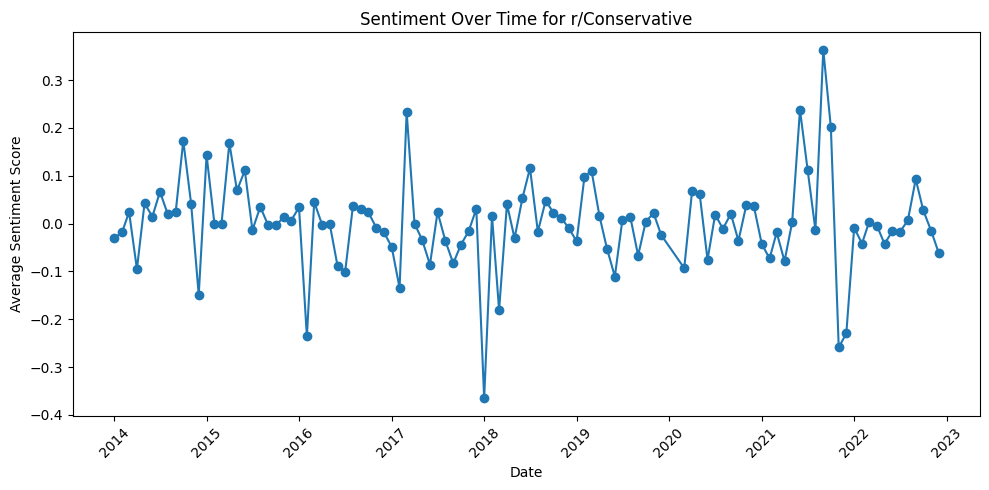

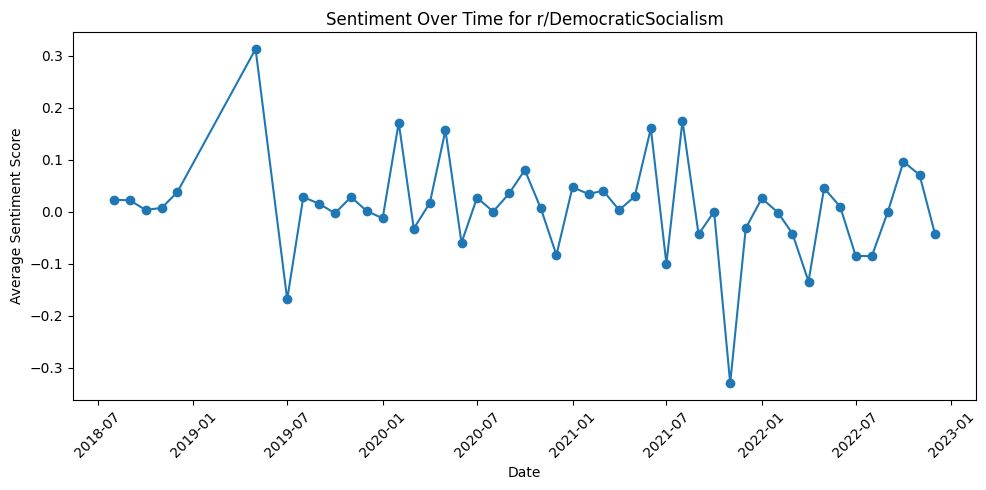

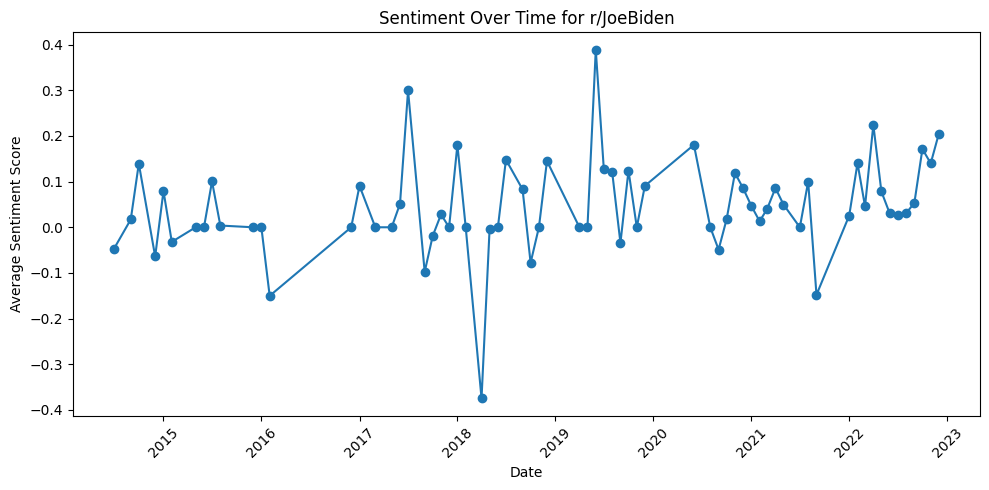

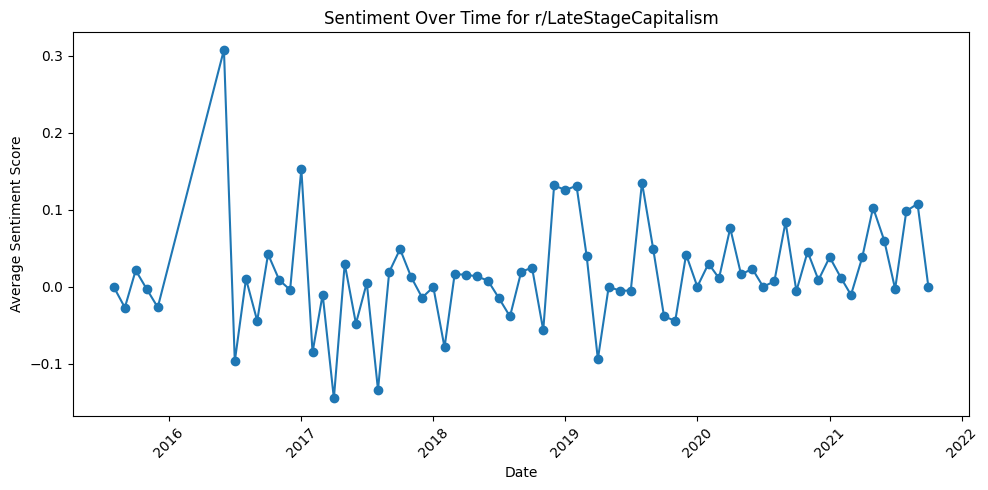

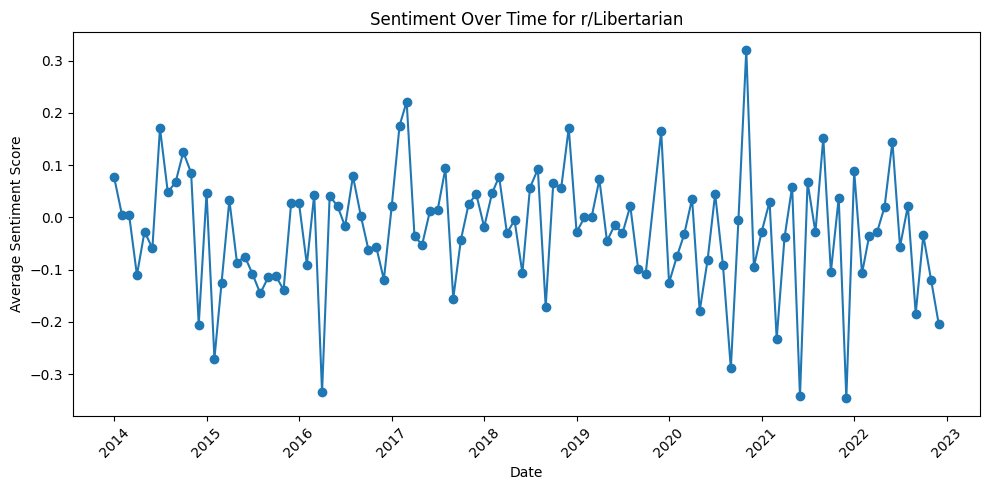

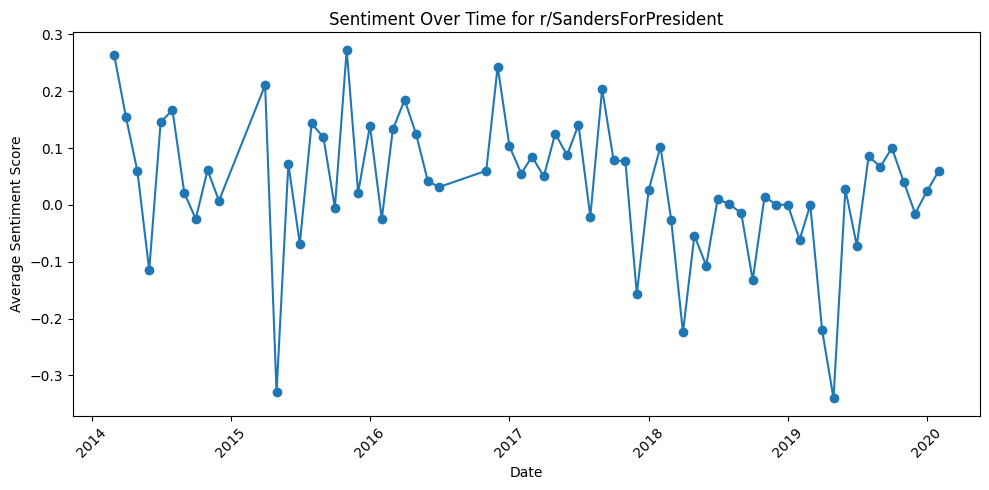

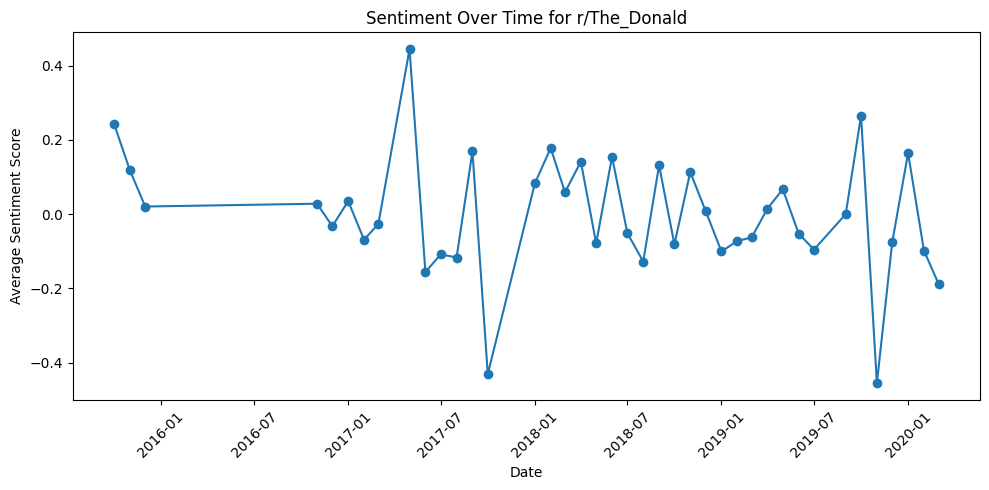

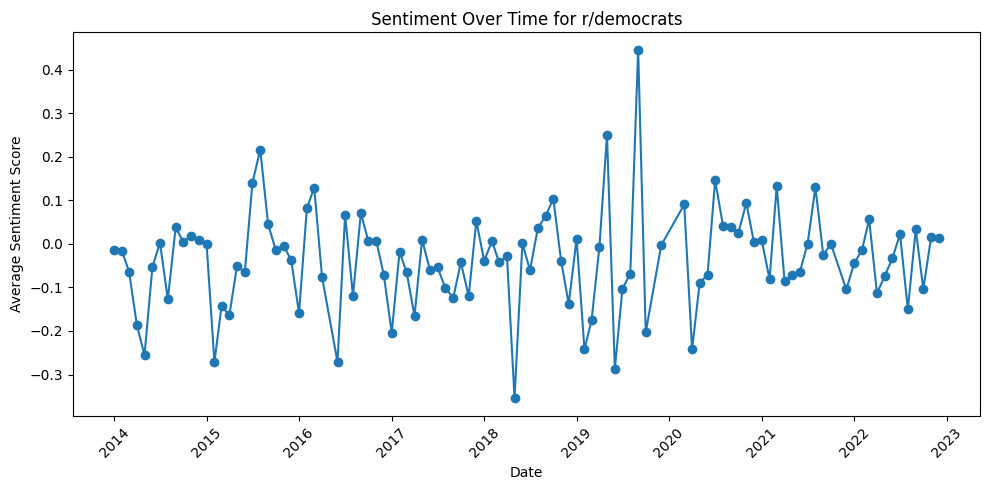

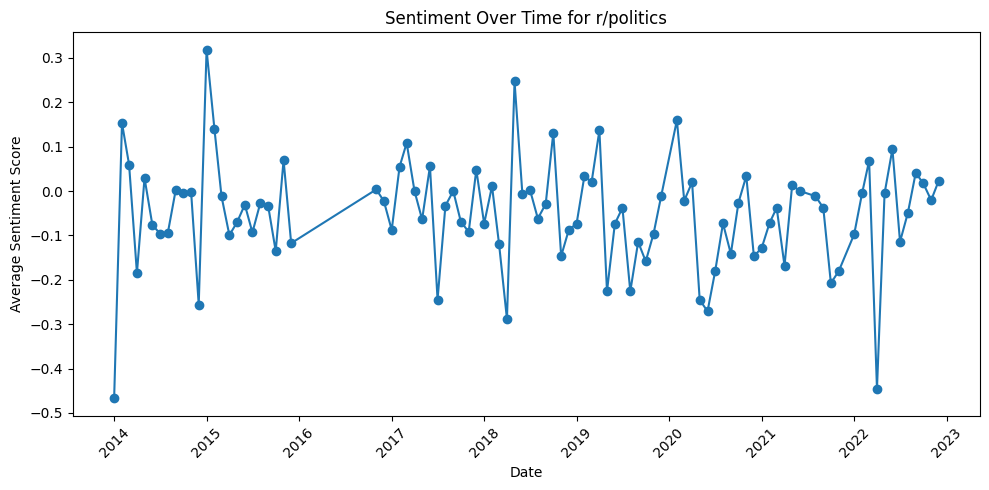

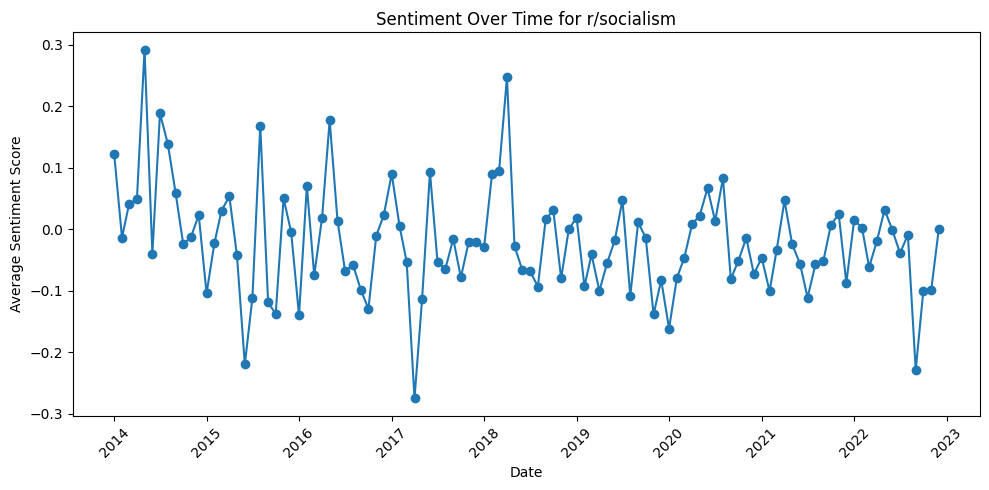

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk import download
from datetime import datetime

# Download VADER lexicon for sentiment analysis
download('vader_lexicon')

# Convert 'created_utc' to datetime format
df['created_utc'] = pd.to_datetime(df['created_utc'])

# Initialize VADER sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Define a function to calculate sentiment scores
def calculate_sentiment(text):
    if pd.notna(text):
        return sia.polarity_scores(text)['compound']
    else:
        return 0  # Return a neutral score if text is NaN

# Apply the sentiment analysis function to title and selftext columns
df['title_sentiment'] = df['title'].apply(calculate_sentiment)
df['selftext_sentiment'] = df['selftext'].apply(calculate_sentiment)

# Create a new column for the average sentiment score of title and selftext
df['average_sentiment'] = df[['title_sentiment', 'selftext_sentiment']].mean(axis=1)

# Group the data by subreddit and month, and calculate the mean sentiment score
df['month'] = df['created_utc'].dt.to_period('M')
monthly_sentiment = df.groupby(['subreddit', 'month'])['average_sentiment'].mean().reset_index()

# Now let's plot the sentiment trend over time for each subreddit individually
for subreddit in monthly_sentiment['subreddit'].unique():
    subreddit_data = monthly_sentiment[monthly_sentiment['subreddit'] == subreddit]
    # Convert period to datetime to plot
    subreddit_data['month'] = subreddit_data['month'].dt.to_timestamp()

    plt.figure(figsize=(10, 5))
    plt.plot(subreddit_data['month'], subreddit_data['average_sentiment'], marker='o')
    plt.title(f"Sentiment Over Time for r/{subreddit}")
    plt.xlabel("Date")
    plt.ylabel("Average Sentiment Score")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import download
import re

download('punkt')
download('stopwords')
download('wordnet')

# Preprocessing function
def preprocess_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic characters
    tokens = word_tokenize(text)  # Tokenize
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatize
    return ' '.join(tokens)

# Combine title and selftext, fill NaN with empty strings
df['combined_text'] = df['title'].fillna('') + ' ' + df['selftext'].fillna('')

# Add a 'year' column to the dataframe
df['created_utc'] = pd.to_datetime(df['created_utc'])
df['year'] = df['created_utc'].dt.year

# Apply preprocessing
df['processed_text'] = df['combined_text'].apply(preprocess_text)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')

# Define function to perform topic modeling and keyword extraction
def analyze_text(data, vectorizer):
    # Guard against empty data
    if data.empty:
        return [], {}

    # Vectorize the text data
    text_matrix = vectorizer.fit_transform(data)

    # If the vocabulary is empty, return empty results
    if not text_matrix.shape[1]:
        return [], {}

    # Extract features (words)
    features = vectorizer.get_feature_names_out()

    # Topic modeling with LDA
    lda = LatentDirichletAllocation(n_components=10, random_state=0)
    lda.fit(text_matrix)

    # Extract topics
    topics = {i: [features[idx] for idx in topic.argsort()[:-11:-1]] for i, topic in enumerate(lda.components_)}

    # Extract top keywords by summing tf-idf scores for each word and sorting
    sums = text_matrix.sum(axis=0)
    sorted_keywords = [features[idx] for idx in np.argsort(sums).A1[::-1][:10]]

    return sorted_keywords, topics

# Perform analysis for each subreddit and each year
results = {}
for subreddit in df['subreddit'].unique():
    for year in df['year'].unique():
        subset = df[(df['subreddit'] == subreddit) & (df['year'] == year)]
        keywords, topics = analyze_text(subset['processed_text'], tfidf_vectorizer)
        results[(subreddit, year)] = {'keywords': keywords, 'topics': topics}

# Print results
for (subreddit, year), content in results.items():
    print(f"Subreddit: {subreddit}, Year: {year}")
    print(f"Top Keywords: {content['keywords']}")
    print(f"Topics: {content['topics']}")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Subreddit: democrats, Year: 2014
Top Keywords: ['obama', 'republican', 'gop', 'obamacare', 'bush', 'fox', 'democrat', 'president', 'vote', 'time']
Topics: {0: ['obama', 'amp', 'bush', 'people', 'republican', 'democrat', 'poverty', 'im', 'stewart', 'jon'], 1: ['rand', 'john', 'poll', 'dick', 'cheney', 'george', 'american', 'obamacare', 'old', 'mean'], 2: ['vote', 'tax', 'obamacare', 'employed', 'family', 'voter', 'need', 'midterm', 'right', 'corporation'], 3: ['elizabeth', 'warren', 'job', 'court', 'conservative', 'judge', 'gop', 'american', 'claim', 'time'], 4: ['vote', 'gop', 'benghazi', 'republican', 'fox', 'unhappy', 'lie', 'party', 'said', 'generation'], 5: ['obama', 'gop', 'minimum', 'wage', 'job', 'tell', 'boehner', 'say', 'ted', 'cruz'], 6: ['rightwingers', 'president', 'year', 'time', 'people', 'obamacare', 'amp', 'governor', 'republican', 'left'], 7: ['fox', 'liberal', 'happy', 'news', 'point', 'state', 'business', 'president', 'democrat', 'generation'], 8: ['state', 'claim', 